Neural Network Basics with R
===

# Outline


*   **Install and load R packages**

*   **`nnet` package**

*   **`neuralnet` package**

# 1. Install and load R packages

May take a while on the Colab

R packages to be installed:

In [1]:
install.packages("reshape")
install.packages("faraway")
install.packages("nnet")
install.packages("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




Load R packages and scripts:

In [0]:
library(reshape)
library(nnet)
library(faraway)
library(neuralnet)
library(datasets)
download.file("https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r","nnet_plot_update.r")
source("nnet_plot_update.r")

# 2. `nnet` package

## 2.1 A regression example: `ozone` data
* We apply the neural networks to the `ozone` data which was analyzed before using the `nnet` package, due to Venables and Ripley (2002). 
* `Ozone` data is included in the `faraway` package, which has 330 observations on the following 10 variables. 
> * **O3** Ozone conc., ppm, at Sandbug AFB.
> * **vh** a numeric vector
>*  **wind** wind speed
>* **humidity** a numeric vector
>* **temp** temperature
>* **ibh** inversion base height
>* **dpg** Daggett pressure gradient
>* **ibt** a numeric vector
>* **vis** visibility
>* **doy** day of the year

In [3]:
attach(ozone)
summary(ozone)

       O3              vh            wind           humidity    
 Min.   : 1.00   Min.   :5320   Min.   : 0.000   Min.   :19.00  
 1st Qu.: 5.00   1st Qu.:5690   1st Qu.: 3.000   1st Qu.:47.00  
 Median :10.00   Median :5760   Median : 5.000   Median :64.00  
 Mean   :11.78   Mean   :5750   Mean   : 4.848   Mean   :58.13  
 3rd Qu.:17.00   3rd Qu.:5830   3rd Qu.: 6.000   3rd Qu.:73.00  
 Max.   :38.00   Max.   :5950   Max.   :11.000   Max.   :93.00  
      temp            ibh              dpg              ibt       
 Min.   :25.00   Min.   : 111.0   Min.   :-69.00   Min.   :-25.0  
 1st Qu.:51.00   1st Qu.: 877.5   1st Qu.: -9.00   1st Qu.:107.0  
 Median :62.00   Median :2112.5   Median : 24.00   Median :167.5  
 Mean   :61.75   Mean   :2572.9   Mean   : 17.37   Mean   :161.2  
 3rd Qu.:72.00   3rd Qu.:5000.0   3rd Qu.: 44.75   3rd Qu.:214.0  
 Max.   :93.00   Max.   :5000.0   Max.   :107.00   Max.   :332.0  
      vis             doy       
 Min.   :  0.0   Min.   : 33.0  
 1st Qu.: 

### 2.1.1 Initial fitting
* We started with just **three** variables for simplicity and fit a feed-forward neural network with **one** hidden layer containing **two** units and a linear output. 
> * Why linear output? This is a regression problem. 

The result (nnmd1) from will contain # of weights and the initial and final residual sum of squres (RSS, a.k.a. sum of squared errors of prediction (SSE)): 

In [4]:
nnmd1 <- nnet(O3~temp+ibh+ibt,ozone,size=2,linout=T)

# weights:  11
initial  value 67657.028070 
final  value 21115.406061 
converged


* Here we also calculate the total sum of squares:

In [5]:
sum((O3-mean(O3))^2)

[1] 21115.41

## Quiz
1. Why the total weights is 11?  

2* (3+1) + 1*(2+1)

2. Is this neural network model good or not? Why?

SST = E + SSE 

### 2.1.2 Scaling variables
* The problems comes from the initial selection of the weights. It is hard to select the initial weights when the variables have very different scales. The solution is to rescale the data to mean zero and unit variance. 

Check standard deviation before and after the scaling:

In [6]:
apply(ozone,2,sd)
ozone2 <- scale(ozone)
apply(ozone2,2,sd)

O3          vh        wind    humidity        temp         ibh 
   8.011277  105.708241    2.116963   19.865000   14.458737 1803.885870 
        dpg         ibt         vis         doy 
  35.717181   76.679424   79.362393  104.376374

O3       vh     wind humidity     temp      ibh      dpg      ibt 
       1        1        1        1        1        1        1        1 
     vis      doy 
       1        1

Now let's see the new RSS:

In [7]:
nnmd1 <- nnet(O3~temp+ibh+ibt,ozone2,size=2,linout=T)

# weights:  11
initial  value 340.154457 
iter  10 value 106.408005
iter  20 value 96.813543
iter  30 value 96.473052
iter  40 value 95.664432
iter  50 value 95.406233
iter  60 value 95.286664
iter  70 value 95.205264
iter  80 value 95.199689
iter  90 value 95.179245
iter 100 value 95.169362
final  value 95.169362 
stopped after 100 iterations


### 2.1.3 Refitting the model 100 times
* Since neural network uses random initial weights, the algorithm may not give the same results for each replication. So we try to refitting the model 100 times using different initial weights and find the best fit of these 100 attempts. 

In [8]:
bestrss <- 10000
for (i in 1:100){
set.seed(i)
 nnmd1 <- nnet(O3~temp+ibh+ibt,ozone2,size=2,linout=T,trace=F)
 if (nnmd1$value < bestrss){
 bestnn <- nnmd1
 bestrss <- nnmd1$value
 }
 }
bestnn$value

[1] 88.53709

Summary of bestnn:

In [9]:
summary(bestnn)

a 3-2-1 network with 11 weights
options were - linear output units 
 b->h1 i1->h1 i2->h1 i3->h1 
-56.93  29.51 -99.99 -55.70 
 b->h2 i1->h2 i2->h2 i3->h2 
  1.14  -0.96   0.83   0.28 
  b->o  h1->o  h2->o 
  3.36  -0.69  -4.51 

* The criterion function has 11 weights. The notation `i2 -> h1` above, for example, refers to the link between the second input variable and the first hidden neuron. `b` refers to the bias, which takes a constant value of one. We see that there is one skip-layer connection, `b->o`, from the bias to the output. 

### 2.1.4 Visualizing the network
* `nnet` package does not provide any tool to visualize the network, but some R developer contributed the source code to do that. 

Loading required package: scales



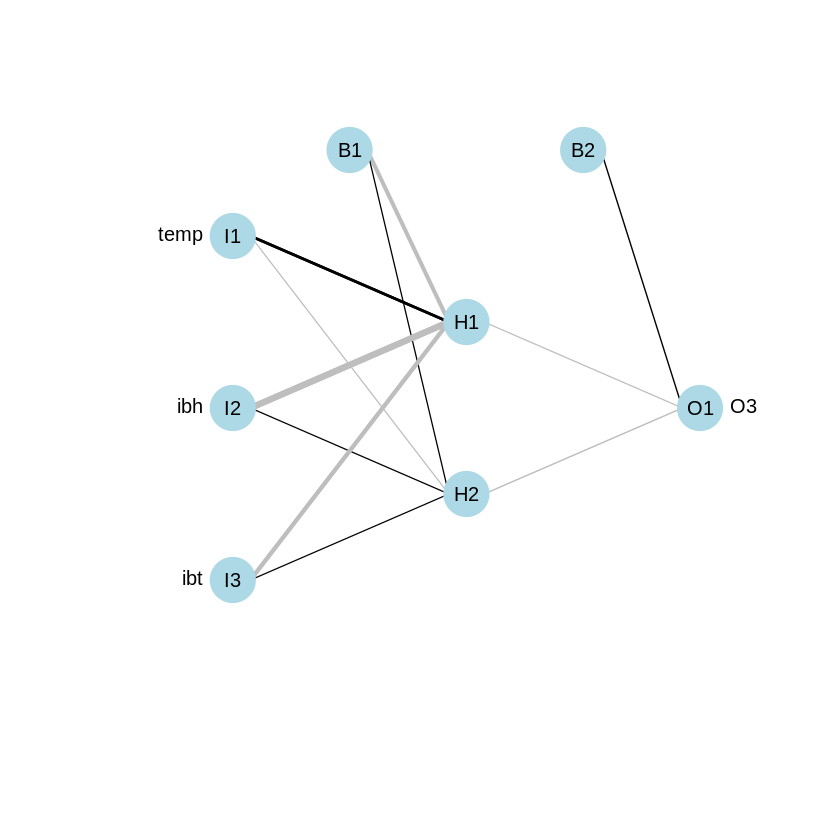

In [10]:
plot.nnet(bestnn) # plot function provided by nnet_plot_update.r

## Exercise 1

1. We can put a penalty such as weight decay to obtian a more stable fit. Let's try $\lambda$ = 0.001

Hint: refer to the `nnet` package manaul to find out the options


In [0]:
bestrss <- 10000
for (i in 1:100){
set.seed(i)
 nnmd1 <- nnet(O3~temp+ibh+ibt,ozone2,size=2,linout=T, decay=0.001 , trace=F)
 if (nnmd1$value < bestrss){
 bestnn <- nnmd1
 bestrss <- nnmd1$value
 }
 }
 bestnn$value
 summary(bestnn)

We can see the best RSS is somewhat larger than before. This is expected because weight decay sacrifices some fit to the current data to obtain a more stable result. 

2. Now fit the full dataset using four hidden units sine there are more inputs. 
> 2.1 Without decay $\lambda$

In [0]:
estrss <- 10000
for (i in 1:100){
set.seed(i)
 nnmd1 <- nnet(O3~ ,    ,    ,   , trace=F)
 if (nnmd1$value < bestrss){
 bestnn <- nnmd1
 bestrss <- nnmd1$value
 }
 }
 bestnn$value
 summary(bestnn)

>2.2 With decay $\lambda$

In [0]:

bestrss <- 10000
for (i in 1:100){
set.seed(i)
 nnmd1 <- nnet(O3 ~   ,     ,     ,     ,    , trace=F )
 if (nnmd1$value < bestrss){
 bestnn <- nnmd1
 bestrss <- nnmd1$value
 }
 }
 bestnn$value
 summary(bestnn)

## Solution 1

1. We can put a penalty such as weight decay to obtian a more stable fit. Let's try $\lambda$ = 0.001

Hint: refer to the `nnet` package manaul to find out the options


In [0]:
bestrss <- 10000
for (i in 1:100){
set.seed(i)
 nnmd1 <- nnet(O3~temp+ibh+ibt,ozone2,size=2,linout=T, decay=0.001 , trace=F)
 if (nnmd1$value < bestrss){
 bestnn <- nnmd1
 bestrss <- nnmd1$value
 }
 }
 bestnn$value
 summary(bestnn)

2. Now fit the full dataset using four hidden units sine there are more inputs. 
> 2.1 Without decay $\lambda$

In [0]:
estrss <- 10000
for (i in 1:100){
set.seed(i)
 nnmd1 <- nnet(O3~. , ozone2   , size=4   , linout=T  , trace=F)
 if (nnmd1$value < bestrss){
 bestnn <- nnmd1
 bestrss <- nnmd1$value
 }
 }
 bestnn$value
 summary(bestnn)

>2.2 With decay $\lambda$

In [0]:
bestrss <- 10000
for (i in 1:100){
set.seed(i)
 nnmd1 <- nnet(O3 ~ .   ,  ozone2   ,  size=4   , linout=T    , decay=0.001, trace=F )
 if (nnmd1$value < bestrss){
 bestnn <- nnmd1
 bestrss <- nnmd1$value
 }
 }
 bestnn$value
 summary(bestnn)

## 2.2 Training ozone data with the `caret` package 
* In R, there is an excellent package `caret` (classification and regression training) which contains functions to streamline the model training process.
> * Can train hundreds of models with resampling methods
> * Easy to manipulate, well documented
> * Will automatically parallelize when multiple cpu cores are registered




### 2.2.1 Install and load the `caret` library

It will take a while on the Colab

In [11]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:faraway’:

    melanoma


Loading required package: ggplot2



### 2.2.2 Main function (`train`) arguments

The `train` function set up a grid search on tuning parameters for vaious of data mining methods. 
* `method` A string specifying which classification or regression model to use. See http://topepo.github.io/caret/train-models-by-tag.html
* `tuneGrid` A data frame with possible tuning values. The columns are named the same asthe tuning parameters. see http://topepo.github.io/caret/available-models.html 


In [0]:
my.grid <- expand.grid(.decay = c(0.0001, 0.001,0.01), .size = c(1, 2, 3,4))
nn.model <- train(O3~ .,ozone2,method="nnet",tuneGrid = my.grid,trace=F)

In [13]:
nn.model

Neural Network 

330 samples
  9 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 330, 330, 330, 330, 330, 330, ... 
Resampling results across tuning parameters:

  decay  size  RMSE       Rsquared   MAE      
  1e-04  1     0.9309984  0.5960121  0.7766659
  1e-04  2     0.8814761  0.5431783  0.7471084
  1e-04  3     0.8147750  0.5345010  0.6991801
  1e-04  4     0.8264754  0.5425544  0.7069818
  1e-03  1     0.8108783  0.5210904  0.6984159
  1e-03  2     0.7989572  0.5336110  0.6902196
  1e-03  3     0.7919510  0.5537361  0.6816771
  1e-03  4     0.7907767  0.5540482  0.6818225
  1e-02  1     0.7990275  0.5304967  0.6878097
  1e-02  2     0.7843063  0.5698325  0.6752541
  1e-02  3     0.7868205  0.5827142  0.6791424
  1e-02  4     0.7846914  0.5843913  0.6751110

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 2 and decay = 0.01.

In [14]:
summary(nn.model)

a 9-2-1 network with 23 weights
options were - decay=0.01
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 i5->h1 i6->h1 i7->h1 i8->h1 i9->h1 
  0.06   1.89  -0.21  -0.46  -2.28   0.15   3.22  -4.39  -0.42   2.02 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 i5->h2 i6->h2 i7->h2 i8->h2 i9->h2 
  2.11  -1.79   2.19  -2.02  -3.80  -0.75  -5.29  -2.28   1.68   1.09 
  b->o  h1->o  h2->o 
  5.09  -9.28 -10.85 

## 3. `neuralnet` package

## 3.1 A classification example: `Infertility` data
* We apply the neural networks to the `Infertility` data using the `neuralnet` package. 
* `Infertility` data is included in the `datasets` package, which has 248 observations on the following 8 variables. 
> * **case** case status is the response, a binary variable with 1 = case and 0 = control
> * **age** age in years of case
>*  **parity** count
>* **education** 0 = 1-5 years 1 = 6-11 years 2 = 12+ years
>* **spontaneous**  number of prior spontaneous abortions 0 = 0, 1 = 1, 2 = 2 or more
>* **induced** number of prior induced abortions 0 = 0, 1 = 1, 2 = 2 or more
>* **stratum**  a numeric vector
>* **pooled.stratum** a numeric vector 


In [0]:
library(reshape)
library(faraway)
library(neuralnet)
library(datasets)

In [16]:
str(infert)
table(infert$case)

'data.frame':	248 obs. of  8 variables:
 $ education     : Factor w/ 3 levels "0-5yrs","6-11yrs",..: 1 1 1 1 2 2 2 2 2 2 ...
 $ age           : num  26 42 39 34 35 36 23 32 21 28 ...
 $ parity        : num  6 1 6 4 3 4 1 2 1 2 ...
 $ induced       : num  1 1 2 2 1 2 0 0 0 0 ...
 $ case          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ spontaneous   : num  2 0 0 0 1 1 0 0 1 0 ...
 $ stratum       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ pooled.stratum: num  3 1 4 2 32 36 6 22 5 19 ...



  0   1 
165  83 

### 3.1.1 Training Set and Test Set

* Dataset could be randomly split into two parts: training set and test set.



In [0]:
set.seed(1)
indx <- sample(1:248,size=248,replace=F)
dat1 <- infert[indx[1:200],] #train set
dat2 <- infert[indx[201:248],] #test set

### 3.1.2 Main function (`neuralnet`) arguments
* `hidden` a vector of integers specifying the number of hidden neurons (vertices) in each layer.
* `threshold` a  vector about the threshold for the partial derivatives of the errorfunction as stopping criteria.
* `algorithm` a string containing the algorithm type to calculate the neural network.
* `err.fct` the error function, which is a differentiable function that is used for the calculation of the error.  Alterna-tively, the strings ’sse’ and ’ce’ which stand for the sum of squared errors andthe cross-entropy can be used.
* `act.fct` the activation function, which is a differentiable function that is used for smoothing the result of the cross productof the covariate or neurons and the weights.  Additionally the strings, ’logistic’and ’tanh’ are possible for the logistic function and tangent hyperbolicus.
* `linear.output` logical. If act.fct should not be applied to the output neurons set linear output toTRUE, otherwise to FALSE.

### 3.1.3 Model fitting
* We started with **four** variables (age+parity+induced+spontaneous) and fit a feed-forward neural network with **one** hidden layer containing **four** units. 
* The error function is cross-entropy (`err.fct="ce"`) since this is a classification problem. 

In [18]:
set.seed(2)
nn <- neuralnet(case~age+parity+induced+spontaneous,data=dat1,hidden=4,err.fct="ce",linear.output=FALSE)
nn

$call
neuralnet(formula = case ~ age + parity + induced + spontaneous, 
    data = dat1, hidden = 4, err.fct = "ce", linear.output = FALSE)

$response
    case
68     1
167    0
129    0
162    0
215    0
43     1
14     1
210    0
187    0
51     1
225    0
85     0
21     1
106    0
182    0
74     1
7      1
73     1
79     1
213    0
37     1
105    0
217    0
110    0
165    0
34     1
235    0
126    0
89     0
172    0
207    0
33     1
84     0
163    0
70     1
233    0
42     1
166    0
111    0
148    0
156    0
20     1
44     1
121    0
87     0
214    0
205    0
40     1
219    0
25     1
119    0
122    0
39     1
179    0
212    0
134    0
24     1
160    0
242    0
130    0
45     1
146    0
22     1
115    0
104    0
203    0
183    0
184    0
103    0
75     1
13     1
201    0
176    0
220    0
23     1
238    0
216    0
180    0
29     1
141    0
150    0
208    0
108    0
48     1
226    0
188    0
149    0
31     1
102    0
145    0
231    0
204    0
83     1
118

### 3.1.4 Training set result

In [19]:
out <- cbind(nn$covariate,nn$net.result[[1]])
dimnames(out) <- list(NULL,c("age","parity","induced","spontaneous","nn-output"))
head(out)

age,parity,induced,spontaneous,nn-output
28,3,1,2,0.9744048
42,1,0,0,0.1688599
37,1,0,0,0.1479201
34,1,0,0,0.1390230
38,3,1,0,0.1086856
41,1,0,0,0.1639095


### 3.1.5 Visualizing the network
* `neuralnet` package's own `plot` function is designed for an inspection of the weights for objectsof class `nn` any tool to visualize the network, but some R developer contributed the source code to do that.

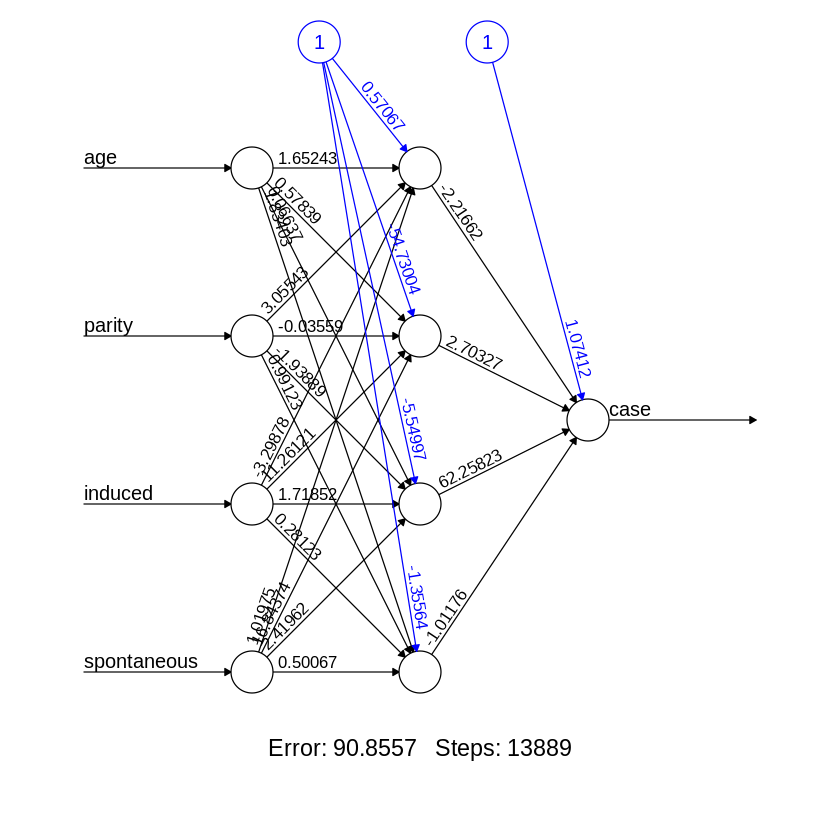

In [20]:
plot(nn, rep="best")

## Exercise 2
1. Test the accuracy of the model with the test set

1.1 Choose four variables (age+parity+induced+spontaneous) from the test data

use `subset` function

In [0]:
temp_test <- subset(,  = )
head(temp_test)

Or use indexing

In [0]:
head()  # find the indices
temp_test <- dat2[]
head(temp_test)

1.2 `neuralnet` package's own `compute` function is designed to compute the prediction variable

In [0]:
nn.results <- compute(nn, temp_test)
head(nn.results$net.result)

1.3 Compare the predicted result to the actual result

In [0]:
results <- data.frame(actual = , prediction = nn.results$net.result)
results

1.4 Misclassification table

Build a confusion matrix: 

In [0]:
roundedresults<-sapply(results,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
table(actual,prediction)

2. Build a two-layer model. The first layer has two hidden units while the second has three

In [0]:
set.seed(2)
nn2 <- neuralnet(case~age+parity+induced+spontaneous,data=dat1,hidden=c(,)    ,err.fct="ce",linear.output=FALSE)
plot(  , rep="best")

## Solution 2
1. Test the accuracy of the model with the test set

1.1 Choose four variables (age+parity+induced+spontaneous) from the test data

use `subset` function

In [0]:
temp_test <- subset(dat2, select = c("age","parity","induced","spontaneous"))
head(temp_test)

Or use indexing

In [0]:
head(dat2)  # find the indices
temp_test <- dat2[,c(2:4,6)]
head(temp_test)

1.2 `neuralnet` package's own `compute` function is designed to compute the prediction variable

In [0]:
nn.results <- compute(nn, temp_test)
head(nn.results$net.result)

1.3 Compare the predicted result to the actual result

In [0]:
results <- data.frame(actual = dat2$case, prediction = nn.results$net.result)
results

1.4 Misclassification table

Build a confusion matrix: 

In [0]:
roundedresults<-sapply(results,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
table(actual,prediction)

2. Build a two-layer model. The first layer has two hidden units while the second has three

In [0]:
set.seed(2)
nn2 <- neuralnet(case~age+parity+induced+spontaneous,data=dat1,hidden=c(2,3)    ,err.fct="ce",linear.output=FALSE)
plot(nn2, rep="best")

# Getting Help

* Documentation: http://www.hpc.lsu.edu/docs
* Contact us
> * Email ticket system: sys-help@loni.org
> * Telephone Help Desk: 225-578-0900

